In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf


# load data

In [3]:
df_seoul = pd.read_csv('seoul_DID_data+tzon.csv')
df_seoul

,opratDate,tzon,areaSdNm,areaSggNm,areaEmdNm,floatingPop,numClosures,time,treatment
0,2023-01-01,0,서울특별시,강남구,도곡동,15.0,0,0,1
1,2023-01-01,0,서울특별시,강남구,삼성동,12.0,0,0,1
2,2023-01-01,0,서울특별시,강남구,수서동,6.0,0,0,1
3,2023-01-01,0,서울특별시,강남구,역삼동,28.0,0,0,1
4,2023-01-01,0,서울특별시,마포구,서교동,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...
148024,2024-12-31,23,서울특별시,광진구,능동,28.0,0,1,1
148025,2024-12-31,23,서울특별시,마포구,서교동,66.0,2,1,1
148026,2024-12-31,23,서울특별시,서대문구,신촌동,2.0,0,1,1
148027,2024-12-31,23,서울특별시,서초구,서초동,303.0,1,1,1


In [4]:
df_busan = pd.read_csv('busan_DID_data+tzon.csv')
df_busan

,opratDate,tzon,areaSdNm,areaSggNm,areaEmdNm,floatingPop,numClosures,time,treatment
0,2023-01-01,0,부산광역시,남구,대연동,2.0,0,0,0
1,2023-01-01,0,부산광역시,부산진구,부전동,6.0,0,0,0
2,2023-01-01,0,부산광역시,부산진구,전포동,2.0,0,0,0
3,2023-01-01,0,부산광역시,사상구,괘법동,3.0,0,0,0
4,2023-01-01,0,부산광역시,사하구,하단동,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...
124564,2024-12-31,23,부산광역시,사상구,괘법동,157.0,1,1,0
124565,2024-12-31,23,부산광역시,사하구,하단동,88.0,1,1,0
124566,2024-12-31,23,부산광역시,연제구,연산동,240.0,0,1,0
124567,2024-12-31,23,부산광역시,해운대구,좌동,134.0,0,1,0


# data preprocessing(floatingPop)

In [5]:
df_seoul_grouped_day = df_seoul.groupby(['opratDate', 'areaSdNm'])[['floatingPop','numClosures','time','treatment']].mean().reset_index()
df_busan_grouped_day = df_busan.groupby(['opratDate', 'areaSdNm'])[['floatingPop','numClosures','time','treatment']].mean().reset_index()

df_seoul_grouped_time = df_seoul.groupby(['opratDate','areaSdNm','tzon'])[['floatingPop','numClosures','time','treatment']].mean().reset_index()
df_busan_grouped_time = df_busan.groupby(['opratDate','areaSdNm','tzon'])[['floatingPop','numClosures','time','treatment']].mean().reset_index()

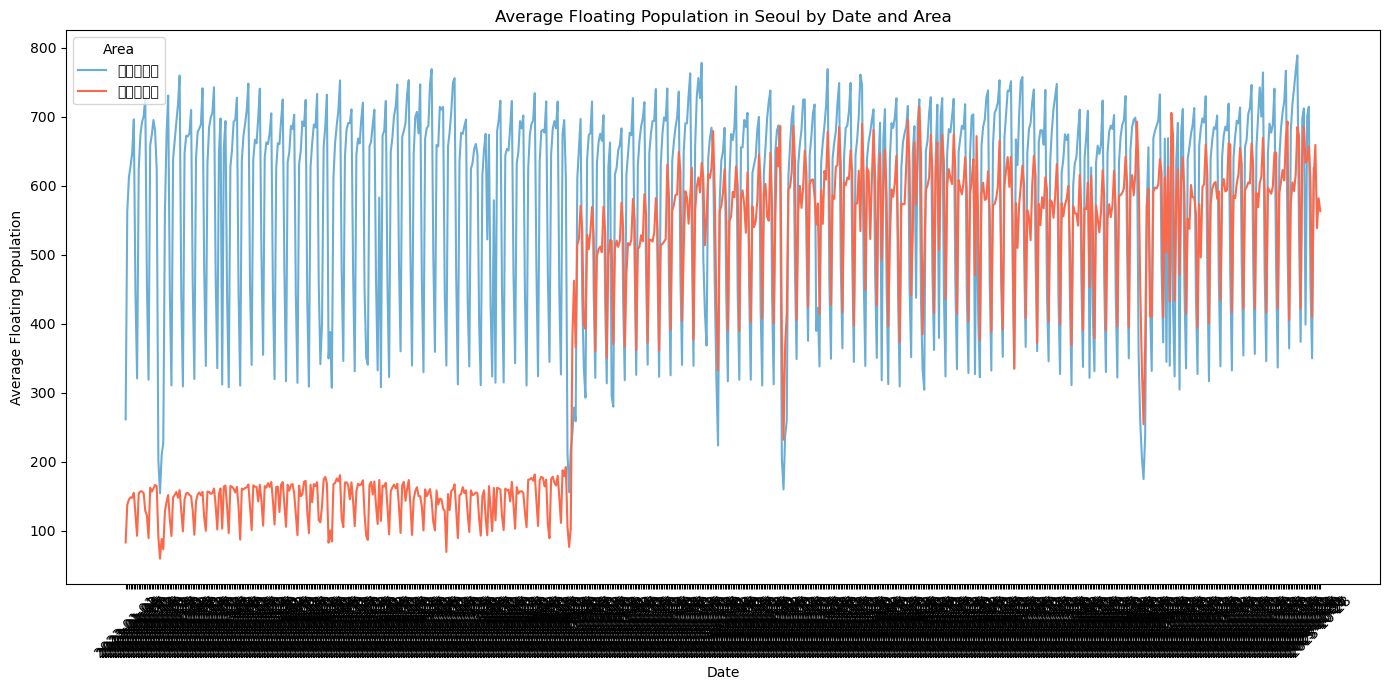

In [6]:
# Plotting the average floating population in Seoul and Busan by date and area grouped by day
plt.figure(figsize=(14, 7))
sns.lineplot(x='opratDate', y='floatingPop', hue='areaSdNm', data=df_seoul_grouped_day, palette='Blues', legend='brief')
sns.lineplot(x='opratDate', y='floatingPop', hue='areaSdNm', data=df_busan_grouped_day, palette='Reds', legend='brief')
plt.xticks(rotation=45)
plt.title('Average Floating Population in Seoul by Date and Area')
plt.xlabel('Date')
plt.ylabel('Average Floating Population')
plt.legend(title='Area', loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
df_busan_grouped_day[['opratDate','floatingPop']] # after 1st, october, 2023 average floating population is increased

,opratDate,floatingPop
0,2023-01-01,83.200000
1,2023-01-02,137.952941
2,2023-01-03,145.578947
3,2023-01-04,148.642857
4,2023-01-05,148.011976
...,...,...
726,2024-12-27,657.147929
727,2024-12-28,609.310345
728,2024-12-29,409.976608
729,2024-12-30,611.988439


In [8]:
# Cutting the DataFrame to show only the data after October 1, 2023
df_seoul_grouped_day_cut = df_seoul_grouped_day[df_seoul_grouped_day['opratDate'] >= '2023-10-01']
df_busan_grouped_day_cut = df_busan_grouped_day[df_busan_grouped_day['opratDate']>= '2023-10-01']

# Cutting the DataFrame to show only the data after October 1, 2023 for time zone DataFrame
df_seoul_grouped_time_cut = df_seoul_grouped_time[df_seoul_grouped_time['opratDate'] >= '2023-10-01']
df_busan_grouped_time_cut = df_busan_grouped_time[df_busan_grouped_time['opratDate'] >= '2023-10-01']

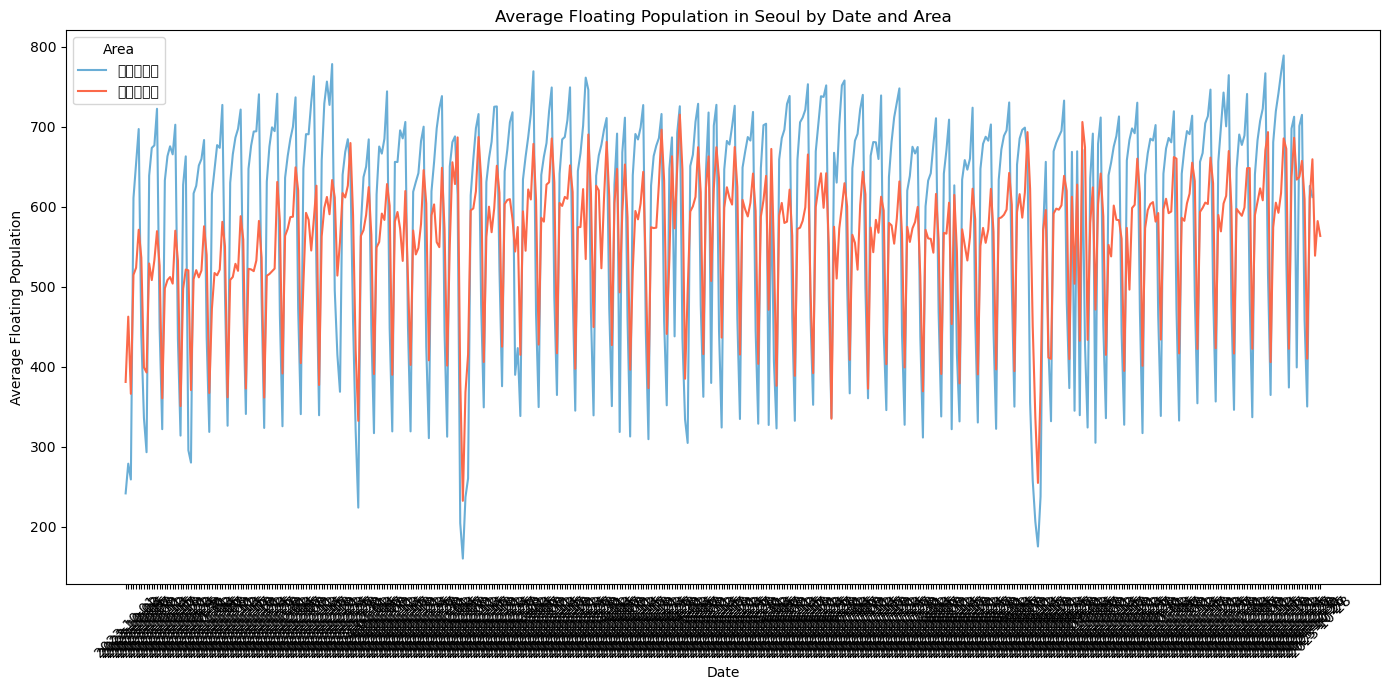

In [9]:
# Plotting the average floating population in Seoul and Busan by date and area
plt.figure(figsize=(14, 7))
sns.lineplot(x='opratDate', y='floatingPop', hue='areaSdNm', data=df_seoul_grouped_day_cut, palette='Blues', legend='brief')
sns.lineplot(x='opratDate', y='floatingPop', hue='areaSdNm', data=df_busan_grouped_day_cut, palette='Reds', legend='brief')
plt.xticks(rotation=45)
plt.title('Average Floating Population in Seoul by Date and Area')
plt.xlabel('Date')
plt.ylabel('Average Floating Population')
plt.legend(title='Area', loc='upper left')
plt.tight_layout()
plt.show()

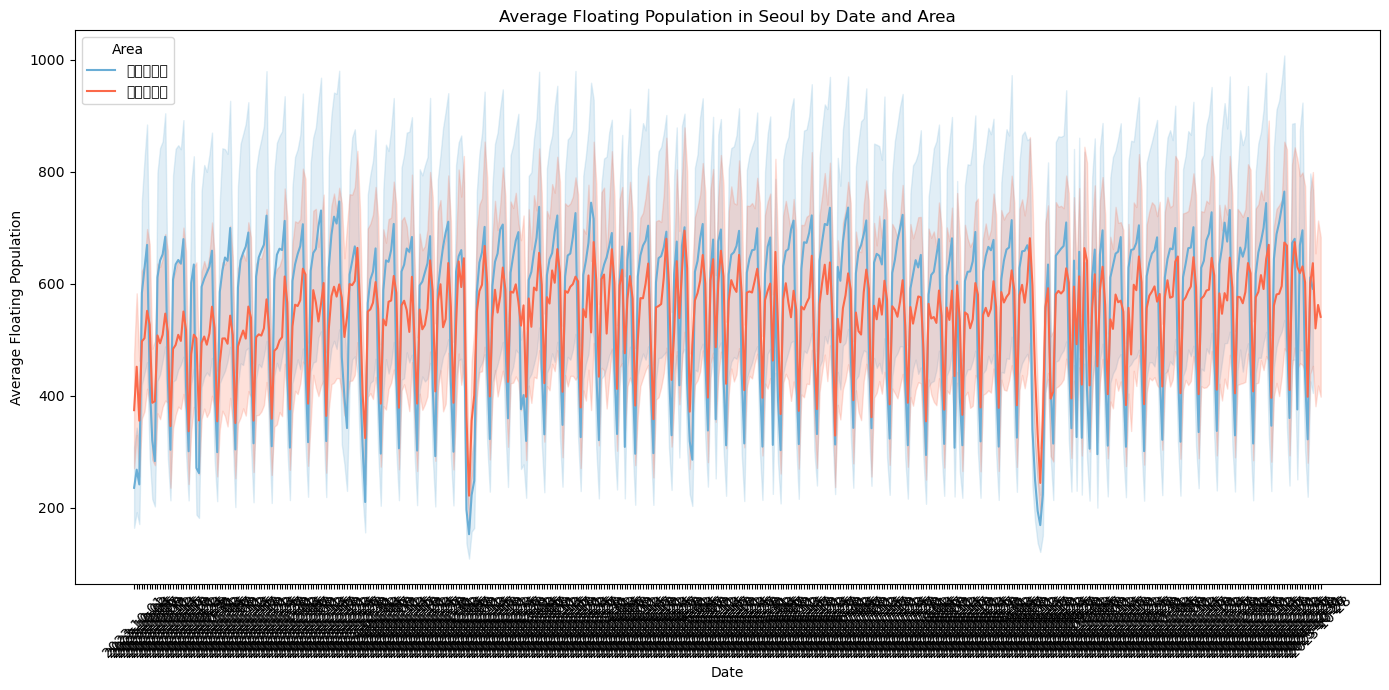

In [10]:
# Plotting the average floating population in Seoul and Busan by date and area
plt.figure(figsize=(14, 7))
sns.lineplot(x='opratDate', y='floatingPop', hue='areaSdNm', data=df_seoul_grouped_time_cut, palette='Blues', legend='brief')
sns.lineplot(x='opratDate', y='floatingPop', hue='areaSdNm', data=df_busan_grouped_time_cut, palette='Reds', legend='brief')
plt.xticks(rotation=45)
plt.title('Average Floating Population in Seoul by Date and Area')
plt.xlabel('Date')
plt.ylabel('Average Floating Population')
plt.legend(title='Area', loc='upper left')
plt.tight_layout()
plt.show()

# data preprocessing(numClosures)

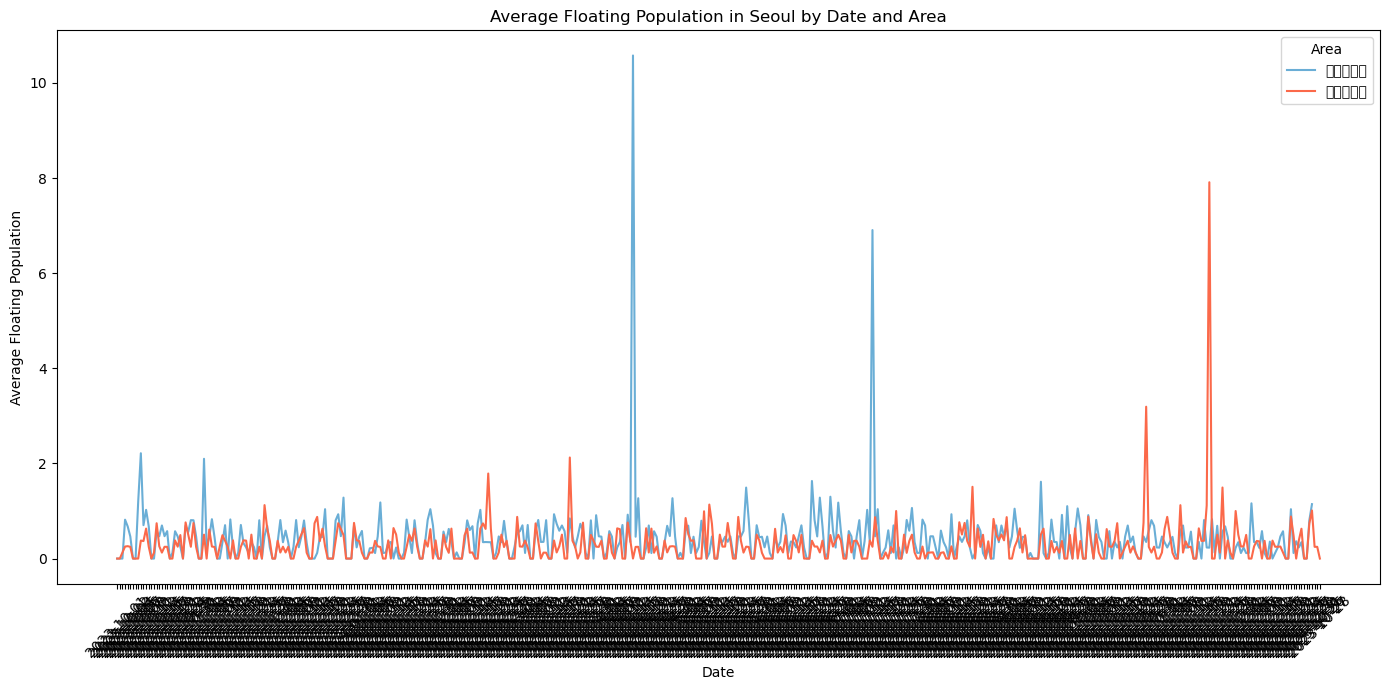

In [11]:
# Plotting the average number of closures in Seoul and Busan by date and area
plt.figure(figsize=(14, 7))
sns.lineplot(x='opratDate', y='numClosures', hue='areaSdNm', data=df_seoul_grouped_day_cut, palette='Blues', legend='brief')
sns.lineplot(x='opratDate', y='numClosures', hue='areaSdNm', data=df_busan_grouped_day_cut, palette='Reds', legend='brief')
plt.xticks(rotation=45)
plt.title('Average Floating Population in Seoul by Date and Area')
plt.xlabel('Date')
plt.ylabel('Average Floating Population')
plt.legend(title='Area')
plt.tight_layout()
plt.show()


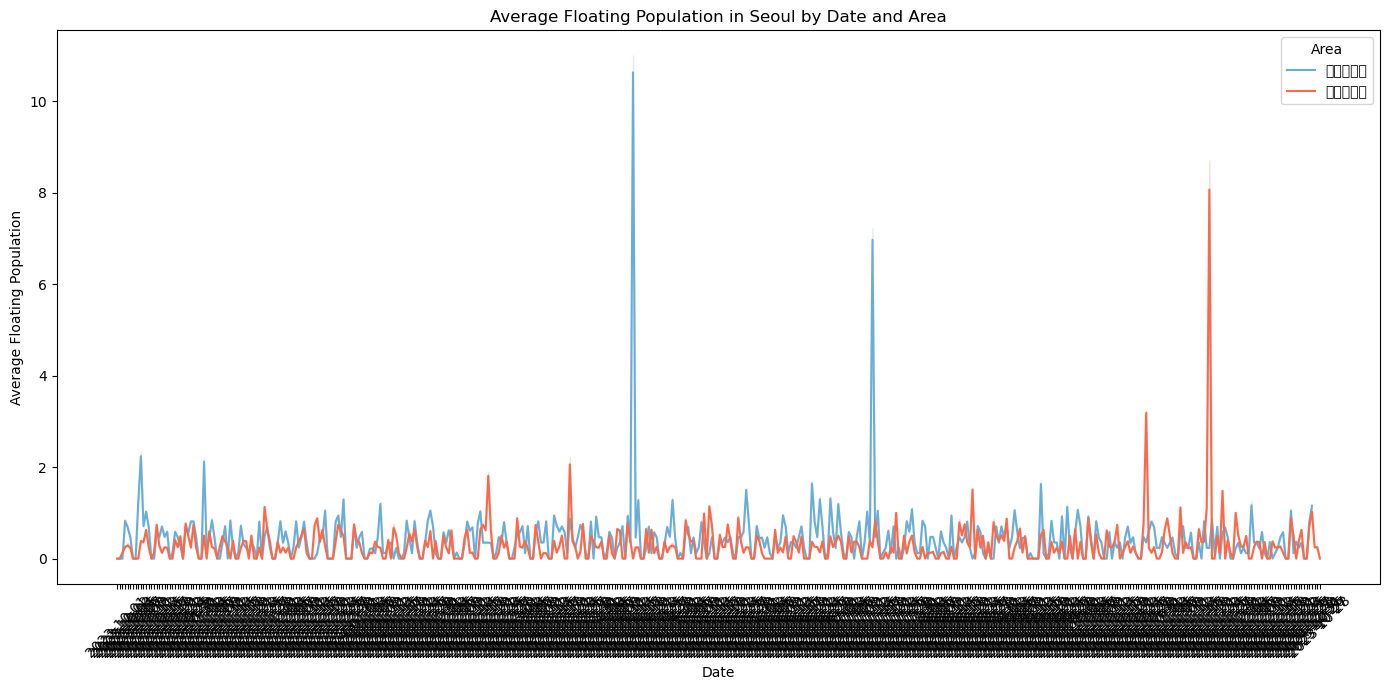

In [12]:
# Plotting the average number of closures in Seoul and Busan by time and area
plt.figure(figsize=(14, 7))
sns.lineplot(x='opratDate', y='numClosures', hue='areaSdNm', data=df_seoul_grouped_time_cut, palette='Blues', legend='brief')
sns.lineplot(x='opratDate', y='numClosures', hue='areaSdNm', data=df_busan_grouped_time_cut, palette='Reds', legend='brief')
plt.xticks(rotation=45)
plt.title('Average Floating Population in Seoul by Date and Area')
plt.xlabel('Date')
plt.ylabel('Average Floating Population')
plt.legend(title='Area')
plt.tight_layout()
plt.show()

In [13]:
# Adding log1p transformation for numClosures
df_seoul_grouped_day_cut['log1p_numClosures'] = np.log1p(df_seoul_grouped_day_cut['numClosures'])
df_busan_grouped_day_cut['log1p_numClosures'] = np.log1p(df_busan_grouped_day['numClosures'])

df_seoul_grouped_time_cut['log1p_numClosures'] = np.log1p(df_seoul_grouped_time_cut['numClosures'])
df_busan_grouped_time_cut['log1p_numClosures'] = np.log1p(df_busan_grouped_time_cut['numClosures'])

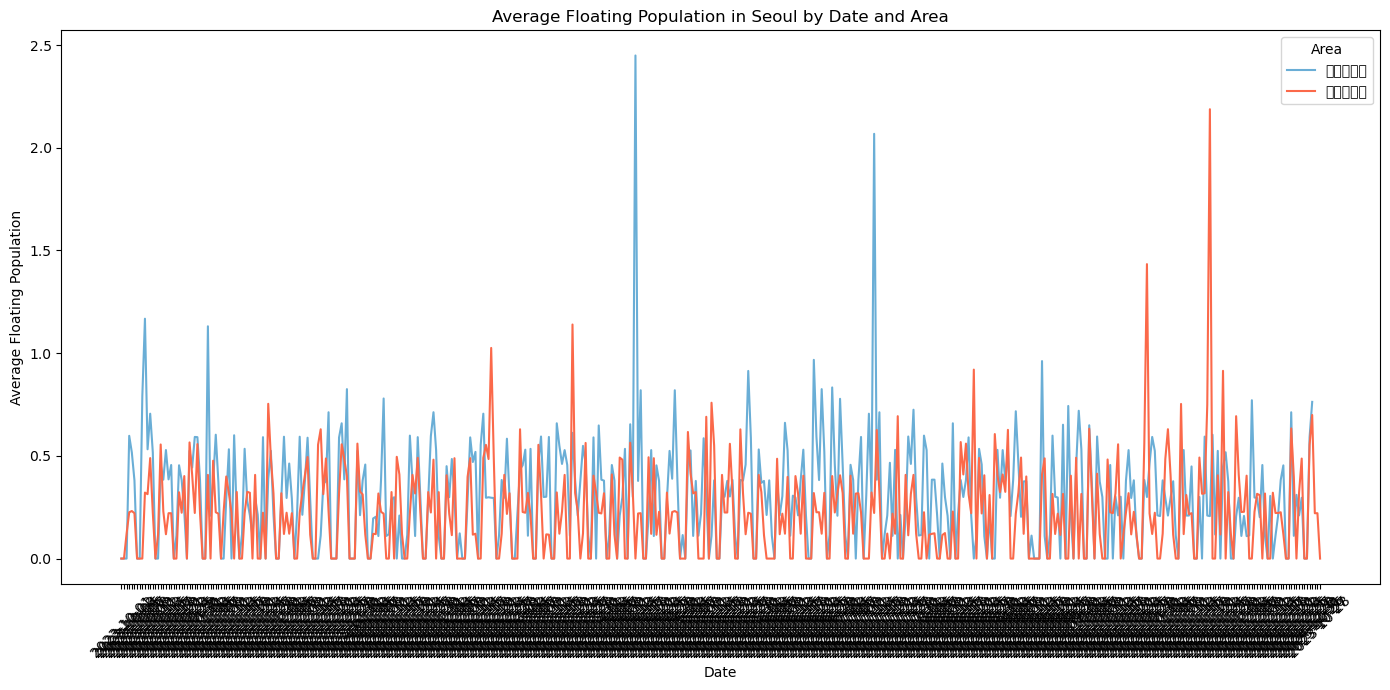

In [14]:
# Plotting the average floating log1p_numClosures in Seoul and Busan by date and area
plt.figure(figsize=(14, 7))
sns.lineplot(x='opratDate', y='log1p_numClosures', hue='areaSdNm', data=df_seoul_grouped_day_cut, palette='Blues', legend='brief')
sns.lineplot(x='opratDate', y='log1p_numClosures', hue='areaSdNm', data=df_busan_grouped_day_cut, palette='Reds', legend='brief')
plt.xticks(rotation=45)
plt.title('Average Floating Population in Seoul by Date and Area')
plt.xlabel('Date')
plt.ylabel('Average Floating Population')
plt.legend(title='Area')
plt.tight_layout()
plt.show()

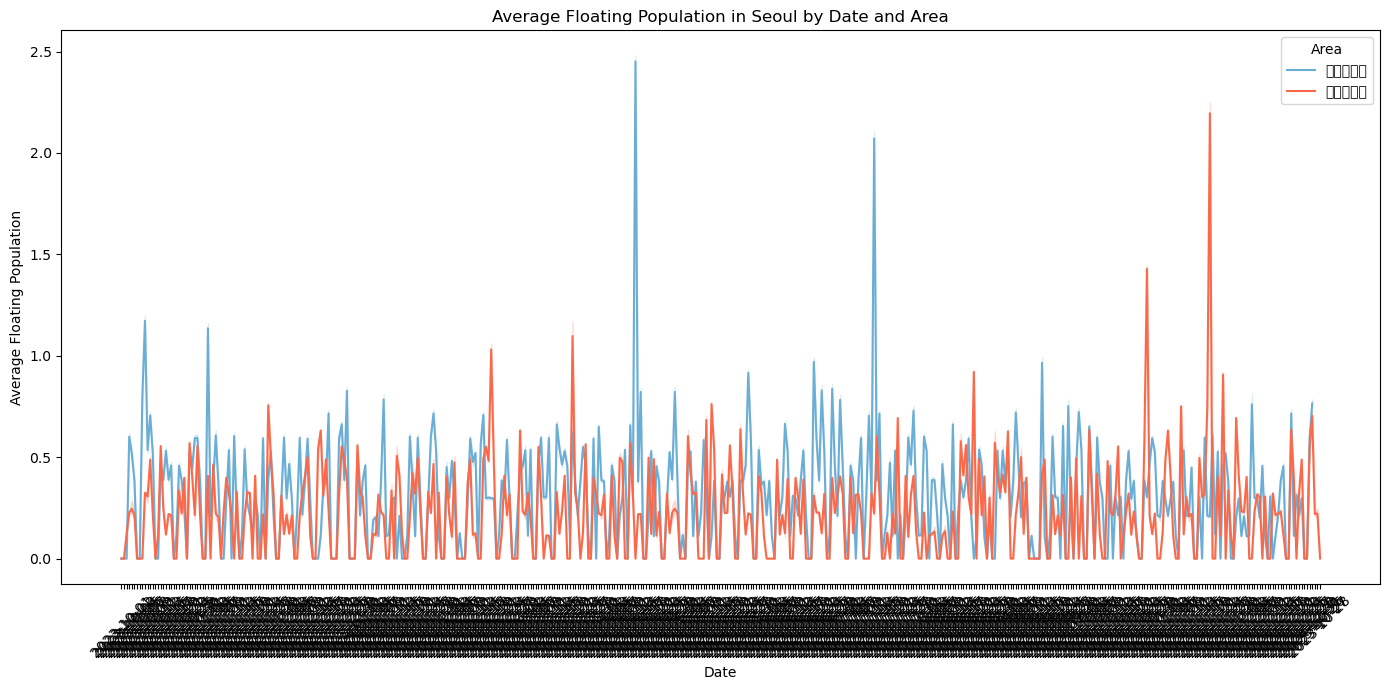

In [15]:
# Plotting the average number of log1p_numClosures in Seoul and Busan by time and area
plt.figure(figsize=(14, 7))
sns.lineplot(x='opratDate', y='log1p_numClosures', hue='areaSdNm', data=df_seoul_grouped_time_cut, palette='Blues', legend='brief')
sns.lineplot(x='opratDate', y='log1p_numClosures', hue='areaSdNm', data=df_busan_grouped_time_cut, palette='Reds', legend='brief')
plt.xticks(rotation=45)
plt.title('Average Floating Population in Seoul by Date and Area')
plt.xlabel('Date')
plt.ylabel('Average Floating Population')
plt.legend(title='Area')
plt.tight_layout()
plt.show()

# DID analysis(floatingPop ~ day)

In [16]:
df_did_seoul_day = df_seoul_grouped_day_cut.copy()
df_did_busan_day = df_busan_grouped_day_cut.copy()

df_did_day = pd.concat([df_did_seoul_day, df_did_busan_day], ignore_index=True)

In [17]:
seoul_before = df_did_seoul_day.query("treatment==1 & time==0")["floatingPop"].mean()
seoul_after = df_did_seoul_day.query("treatment==1 & time==1")["floatingPop"].mean()
print('seoul_after - seoul_before: ', seoul_after - seoul_before)

busan_before = df_did_busan_day.query("treatment==0 & time==0")["floatingPop"].mean()
busan_after = df_did_busan_day.query("treatment==0 & time==1")["floatingPop"].mean()
print('busan_after - busan_before: ', busan_after - busan_before)

diff_in_diff = (seoul_after - seoul_before)-(busan_after - busan_before)
print('diff_in_diff: ', diff_in_diff)

seoul_after - seoul_before:  13.234109888056878
busan_after - busan_before:  39.977589875790386
diff_in_diff:  -26.743479987733508


In [18]:
smf.ols('floatingPop ~ treatment*time', data=df_did_day).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,526.9749,11.563,45.576,0.000,504.283,549.667
treatment,45.3584,16.462,2.755,0.006,13.051,77.666
time,39.9776,13.342,2.996,0.003,13.794,66.161
treatment:time,-26.7435,18.963,-1.410,0.159,-63.960,10.473


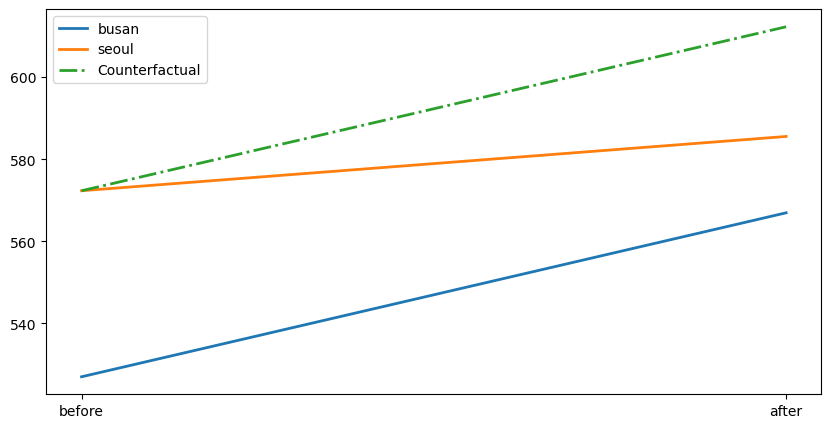

In [19]:
plt.figure(figsize=(10,5))
plt.plot(["before", "after"], [busan_before, busan_after], label="busan", lw=2)
plt.plot(["before", "after"], [seoul_before, seoul_after], label="seoul", lw=2)

plt.plot(["before", "after"], [seoul_before, seoul_before+(busan_after-busan_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend()
plt.show()

# DID analysis(floatingPop ~ time)

In [20]:
df_did_seoul_time = df_seoul_grouped_time_cut.copy()
df_did_busan_time = df_busan_grouped_time_cut.copy()

df_did_time = pd.concat([df_did_seoul_time, df_did_busan_time], ignore_index=True)

In [21]:
seoul_before = df_did_seoul_time.query("treatment==1 & time==0")["floatingPop"].mean()
seoul_after = df_did_seoul_time.query("treatment==1 & time==1")["floatingPop"].mean()
print('seoul_after - seoul_before: ', seoul_after - seoul_before)

busan_before = df_did_busan_time.query("treatment==0 & time==0")["floatingPop"].mean()
busan_after = df_did_busan_time.query("treatment==0 & time==1")["floatingPop"].mean()
print('busan_after - busan_before: ', busan_after - busan_before)

diff_in_diff = (seoul_after - seoul_before)-(busan_after - busan_before)
print('diff_in_diff: ', diff_in_diff)

seoul_after - seoul_before:  14.213721870056816
busan_after - busan_before:  40.36659911612594
diff_in_diff:  -26.152877246069124


In [22]:
smf.ols('floatingPop ~ treatment*time', data=df_did_time).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,510.0362,8.419,60.582,0.000,493.534,526.538
treatment,37.7985,11.736,3.221,0.001,14.794,60.802
time,40.3666,9.717,4.154,0.000,21.320,59.413
treatment:time,-26.1529,13.523,-1.934,0.053,-52.658,0.352


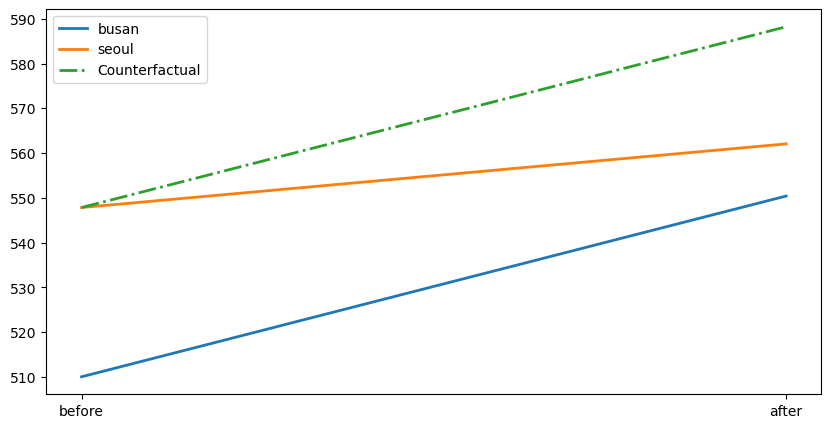

In [23]:
plt.figure(figsize=(10,5))
plt.plot(["before", "after"], [busan_before, busan_after], label="busan", lw=2)
plt.plot(["before", "after"], [seoul_before, seoul_after], label="seoul", lw=2)

plt.plot(["before", "after"], [seoul_before, seoul_before+(busan_after-busan_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend()
plt.show()

# DID analysis(numClosures ~ day)

In [24]:
df_did_seoul_day = df_seoul_grouped_day_cut.copy()
df_did_busan_day = df_busan_grouped_day_cut.copy()

df_did_day = pd.concat([df_did_seoul_day, df_did_busan_day], ignore_index=True)

In [25]:
seoul_before = df_did_seoul_day.query("treatment==1 & time==0")["numClosures"].mean()
seoul_after = df_did_seoul_day.query("treatment==1 & time==1")["numClosures"].mean()
print('seoul_after - seoul_before: ', seoul_after - seoul_before)

busan_before = df_did_busan_day.query("treatment==0 & time==0")["numClosures"].mean()
busan_after = df_did_busan_day.query("treatment==0 & time==1")["numClosures"].mean()
print('busan_after - busan_before: ', busan_after - busan_before)

diff_in_diff = (seoul_after - seoul_before)-(busan_after - busan_before)
print('diff_in_diff: ', diff_in_diff)

seoul_after - seoul_before:  0.04336456447466619
busan_after - busan_before:  0.05427617210100261
diff_in_diff:  -0.010911607626336417


In [26]:
smf.ols('numClosures ~ treatment*time', data=df_did_time).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2497,0.012,20.975,0.000,0.226,0.273
treatment,0.1399,0.017,8.426,0.000,0.107,0.172
time,0.0540,0.014,3.933,0.000,0.027,0.081
treatment:time,-0.0106,0.019,-0.553,0.581,-0.048,0.027


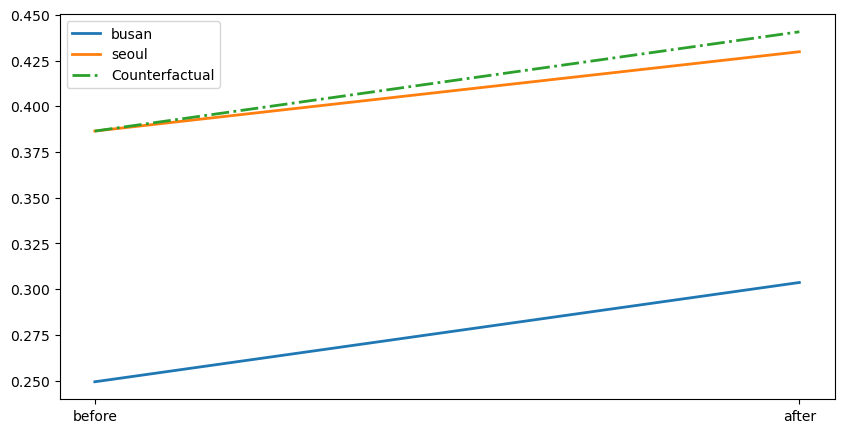

In [27]:
plt.figure(figsize=(10,5))
plt.plot(["before", "after"], [busan_before, busan_after], label="busan", lw=2)
plt.plot(["before", "after"], [seoul_before, seoul_after], label="seoul", lw=2)

plt.plot(["before", "after"], [seoul_before, seoul_before+(busan_after-busan_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend()
plt.show()

# DID analysis(numClosures ~ time)

In [28]:
df_did_seoul_time = df_seoul_grouped_time_cut.copy()
df_did_busan_time = df_busan_grouped_time_cut.copy()

df_did_time = pd.concat([df_did_seoul_time, df_did_busan_time], ignore_index=True)

In [29]:
seoul_before = df_did_seoul_time.query("treatment==1 & time==0")["numClosures"].mean()
seoul_after = df_did_seoul_time.query("treatment==1 & time==1")["numClosures"].mean()
print('seoul_after - seoul_before: ', seoul_after - seoul_before)

busan_before = df_did_busan_time.query("treatment==0 & time==0")["numClosures"].mean()
busan_after = df_did_busan_time.query("treatment==0 & time==1")["numClosures"].mean()
print('busan_after - busan_before: ', busan_after - busan_before)

diff_in_diff = (seoul_after - seoul_before)-(busan_after - busan_before)
print('diff_in_diff: ', diff_in_diff)

seoul_after - seoul_before:  0.04347698768120278
busan_after - busan_before:  0.05404661310550954
diff_in_diff:  -0.010569625424306756


In [30]:
smf.ols('numClosures ~ treatment*time', data=df_did_time).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2497,0.012,20.975,0.000,0.226,0.273
treatment,0.1399,0.017,8.426,0.000,0.107,0.172
time,0.0540,0.014,3.933,0.000,0.027,0.081
treatment:time,-0.0106,0.019,-0.553,0.581,-0.048,0.027


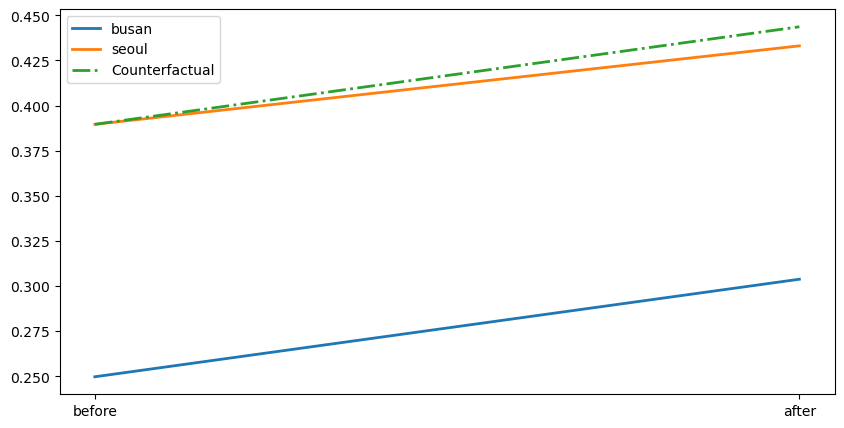

In [31]:
plt.figure(figsize=(10,5))
plt.plot(["before", "after"], [busan_before, busan_after], label="busan", lw=2)
plt.plot(["before", "after"], [seoul_before, seoul_after], label="seoul", lw=2)

plt.plot(["before", "after"], [seoul_before, seoul_before+(busan_after-busan_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend()
plt.show()

# # DID analysis(log1p_numClosures ~ time)

In [32]:
seoul_before = df_did_seoul_time.query("treatment==1 & time==0")["numClosures"].mean()
seoul_after = df_did_seoul_time.query("treatment==1 & time==1")["numClosures"].mean()
print('seoul_after - seoul_before: ', seoul_after - seoul_before)

busan_before = df_did_busan_time.query("treatment==0 & time==0")["numClosures"].mean()
busan_after = df_did_busan_time.query("treatment==0 & time==1")["numClosures"].mean()
print('busan_after - busan_before: ', busan_after - busan_before)

diff_in_diff = (seoul_after - seoul_before)-(busan_after - busan_before)
print('diff_in_diff: ', diff_in_diff)

seoul_after - seoul_before:  0.04347698768120278
busan_after - busan_before:  0.05404661310550954
diff_in_diff:  -0.010569625424306756


In [33]:
smf.ols('log1p_numClosures ~ treatment*time', data=df_did_time).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2037,0.005,39.436,0.000,0.194,0.214
treatment,0.0873,0.007,12.131,0.000,0.073,0.101
time,0.0206,0.006,3.463,0.001,0.009,0.032
treatment:time,-0.0037,0.008,-0.445,0.656,-0.020,0.013


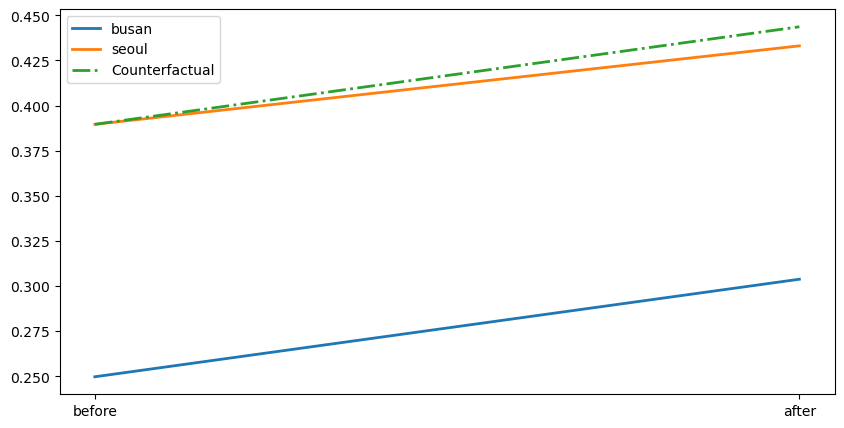

In [34]:
plt.figure(figsize=(10,5))
plt.plot(["before", "after"], [busan_before, busan_after], label="busan", lw=2)
plt.plot(["before", "after"], [seoul_before, seoul_after], label="seoul", lw=2)

plt.plot(["before", "after"], [seoul_before, seoul_before+(busan_after-busan_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend()
plt.show()

# two way fixed 

In [91]:
import pandas as pd

# 1. opratDate를 datetime으로 변환
df_busan['opratDate'] = pd.to_datetime(df_busan['opratDate'])
df_seoul['opratDate'] = pd.to_datetime(df_seoul['opratDate'])

# 2. 데이터프레임 병합
df = pd.concat([
    df_busan[df_busan['opratDate'] >= '2023-10-01'], 
    df_seoul[df_seoul['opratDate'] >= '2023-10-01']
], ignore_index=True)

# 3. datetime 컬럼 생성
df['datetime'] = df['opratDate'] + pd.to_timedelta(df['tzon'], unit='h')

In [73]:
df

,opratDate,tzon,areaSdNm,areaSggNm,areaEmdNm,floatingPop,numClosures,time,treatment,datetime
0,2023-10-01,0,부산광역시,남구,대연동,27.0,0,0,0,2023-10-01 00:00:00
1,2023-10-01,0,부산광역시,부산진구,부전동,30.0,0,0,0,2023-10-01 00:00:00
2,2023-10-01,0,부산광역시,부산진구,전포동,11.0,0,0,0,2023-10-01 00:00:00
3,2023-10-01,0,부산광역시,사상구,괘법동,7.0,0,0,0,2023-10-01 00:00:00
4,2023-10-01,0,부산광역시,사하구,하단동,9.0,0,0,0,2023-10-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
170948,2024-12-31,23,서울특별시,광진구,능동,28.0,0,1,1,2024-12-31 23:00:00
170949,2024-12-31,23,서울특별시,마포구,서교동,66.0,2,1,1,2024-12-31 23:00:00
170950,2024-12-31,23,서울특별시,서대문구,신촌동,2.0,0,1,1,2024-12-31 23:00:00
170951,2024-12-31,23,서울특별시,서초구,서초동,303.0,1,1,1,2024-12-31 23:00:00


In [ ]:
from linearmodels.panel import PanelOLS
df = df.set_index(['areaSggNm','opratDate'])
model = PanelOLS.from_formula(
    'numClosures ~ floatingPop + EntityEffects + TimeEffects',
    drop_absorbed=True,
    data=df,
)
result = model.fit()
print(result.summary)

# Within R² = 0.3357 -> 개체 내 차이는 0.63%만 설명
# Between R² = 0.3357 → 개체 간 차이는 33.57% 설명

#floatingPop 계수 = 0.0002 (p=0.0000)
#통계적 유의성: 매우 강함 (p < 0.01)
#실질적 의미: 계수값이 0.0002로 극히 작음 → 실제 영향력 미미
#예: floatingPop이 10,000명 증가하면 서울의 numClosures는 2건 증가
# → 통계적 유의성 ≠ 실질적 유의성 주의 필요


                          PanelOLS Estimation Summary                           
Dep. Variable:            numClosures   R-squared:                        0.0041
Estimator:                   PanelOLS   R-squared (Between):              0.3357
No. Observations:              170953   R-squared (Within):               0.0062
Date:                    목, 6 05 2025   R-squared (Overall):              0.0309
Time:                        12:22:05   Log-likelihood                -3.213e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      708.21
Entities:                          12   P-value                           0.0000
Avg Obs:                    1.425e+04   Distribution:                F(1,170483)
Min Obs:                       7895.0                                           
Max Obs:                     4.35e+04   F-statistic (robust):             708.21
                            

In [ ]:
from linearmodels.panel import PanelOLS
df = df.set_index(['areaSdNm','opratDate'])
model = PanelOLS.from_formula(
    'numClosures ~ floatingPop + EntityEffects + TimeEffects',
    drop_absorbed=True,
    data=df,
)
result = model.fit()
print(result.summary)

# Within R² = 0.0119 -> 개체 내 차이는 1.19%만 설명
# Between R² = 0.5692 → 개체 간 차이는 56.92% 설명

#floatingPop 계수 = 0.0002 (p=0.0000)
#통계적 유의성: 매우 강함 (p < 0.01)
#실질적 의미: 계수값이 0.0002로 극히 작음 → 실제 영향력 미미
#예: floatingPop이 10,000명 증가하면 서울의 행정동의 numClosures는 2건 증가
# → 통계적 유의성 ≠ 실질적 유의성 주의 필요


                          PanelOLS Estimation Summary                           
Dep. Variable:            numClosures   R-squared:                        0.0097
Estimator:                   PanelOLS   R-squared (Between):              0.5692
No. Observations:              170953   R-squared (Within):               0.0119
Date:                    목, 6 05 2025   R-squared (Overall):              0.0376
Time:                        12:31:21   Log-likelihood                -3.226e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1668.9
Entities:                           2   P-value                           0.0000
Avg Obs:                    8.548e+04   Distribution:                F(1,170493)
Min Obs:                    7.818e+04                                           
Max Obs:                    9.278e+04   F-statistic (robust):             1668.9
                            